In [1]:
# %matplotlib notebook

import matplotlib
import sys
sys.path.append('/home/ab/Modules/Python/') # Added for the modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
plt.style.use('bmh')

In [2]:
from adt.data import Data

            Variable Name	  Description
            portfolio_id	unique ID
            desk_id	      manager ID (the person handling the portfolio, it can be a team)
            office_id	place where portfolio is managed
            pf_category	portfolio category (anonymised)
            start_date	date when portfolio started
            sold	currency (amount sold)
            euribor_rate	euribor lending rate (monthly average)
            currency	currency in which transaction was made
            libor_rate	libor lending rate (monthly average)
            country_code	country where office is
            bought	currency (price at which portfolio is bought)
            creation_date	date when portfolio instruments were traded
            indicator_code	anonymised
            sell_date	date when portfolio is sold
            type	type of portfolio
            hedge_value	if a portfolio got hedged
            status	anonymised
            RETURN	target variable

In [3]:
data = Data(pd.read_csv('../Data/train.csv'),pd.read_csv('../Data/test.csv')
            ,['desk_id','office_id','pf_category','country_code','currency','indicator_code','type','hedge_value','status'],['sold','bought'],modular = ['sell_date','start_date','creation_date'])

train : (9366, 18)
test: (4801, 17)


In [4]:
data.columns()

['portfolio_id',
 'desk_id',
 'office_id',
 'pf_category',
 'start_date',
 'sold',
 'country_code',
 'euribor_rate',
 'currency',
 'libor_rate',
 'bought',
 'creation_date',
 'indicator_code',
 'sell_date',
 'type',
 'hedge_value',
 'status']

In [5]:
data.train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9366 entries, 0 to 9365
Data columns (total 18 columns):
portfolio_id      9366 non-null object
desk_id           5701 non-null object
office_id         9366 non-null object
pf_category       9366 non-null object
start_date        9366 non-null int64
sold              9364 non-null float64
country_code      9366 non-null object
euribor_rate      9366 non-null float64
currency          9366 non-null object
libor_rate        8892 non-null float64
bought            9364 non-null float64
creation_date     9366 non-null int64
indicator_code    3667 non-null object
sell_date         9366 non-null int64
type              9366 non-null object
hedge_value       3665 non-null object
status            6282 non-null object
return            9366 non-null float64
dtypes: float64(5), int64(3), object(10)
memory usage: 1.3+ MB


# Lets Start by plotting the target distribution

In [6]:
y = data.train['return'].values

In [7]:
plt.hist(y,bins=50)
plt.xlabel('target')
plt.ylabel('Count')
plt.title('Distribution of target value')
print('Target value min {0:.3f} max {1:.3f} mean {2:.3f} std {3:.3f}'.format(np.min(y), np.max(y), np.mean(y), np.std(y)))

Target value min -0.010 max 0.778 mean 0.014 std 0.021


### The target value is log normal Distributed with min of -0.010 and max of 0.778 and mean 0.014 and std 0.021

Converted Datetime

In [8]:
data.train['start_date'] = list(map(lambda x: np.datetime64(datetime.strptime(str(x),'%Y%m%d')), data.train['start_date'].values))
data.test['start_date'] = list(map(lambda x: np.datetime64(datetime.strptime(str(x),'%Y%m%d')), data.test['start_date'].values))
data.train['creation_date'] = list(map(lambda x: np.datetime64(datetime.strptime(str(x),'%Y%m%d')), data.train['creation_date'].values))
data.test['creation_date'] = list(map(lambda x: np.datetime64(datetime.strptime(str(x),'%Y%m%d')), data.test['creation_date'].values))
data.train['sell_date'] = list(map(lambda x: np.datetime64(datetime.strptime(str(x),'%Y%m%d')), data.train['sell_date'].values))
data.test['sell_date'] = list(map(lambda x: np.datetime64(datetime.strptime(str(x),'%Y%m%d')), data.test['sell_date'].values))

# train['creation_date']=train['creation_date'].apply(lambda x:parse_date(str(x)))
# train['start_date']=train['start_date'].apply(lambda x:parse_date(str(x)))
# train['sell_date']=train['sell_date'].apply(lambda x:parse_date(str(x)))

# test['creation_date']=test['creation_date'].apply(lambda x:parse_date(str(x)))
# test['start_date']=test['start_date'].apply(lambda x:parse_date(str(x)))
# test['sell_date']=test['sell_date'].apply(lambda x:parse_date(str(x)))
data.train['creation_date']=pd.to_datetime(data.train['creation_date'])
data.train['start_date']=pd.to_datetime(data.train['start_date'])
data.train['sell_date']=pd.to_datetime(data.train['sell_date'])

data.test['creation_date']=pd.to_datetime(data.test['creation_date'])
data.test['start_date']=pd.to_datetime(data.test['start_date'])
data.test['sell_date']=pd.to_datetime(data.test['sell_date'])

In [9]:
def extractDateTime(df,m=False,y=False,d=False):
    if m:
        return df.apply(lambda x: x.month)
    if y:
        return df.apply(lambda x: x.year)
    if d:
        return df.apply(lambda x: x.day)

In [10]:
for i in data.getCustom('date'):
    a = i.split('_')[0]
    day = a + '_day'
    month = a + '_month'
    year = a + '_year'
    data.addColumns(day,extractDateTime(data.train[i],d=True),extractDateTime(data.train[i],d=True),'mod')
    data.addColumns(month,extractDateTime(data.train[i],m=True),extractDateTime(data.train[i],m=True),'mod')
    data.addColumns(year,extractDateTime(data.train[i],y=True),extractDateTime(data.train[i],y=True),'mod')
    

In [11]:
data.train.columns

Index(['portfolio_id', 'desk_id', 'office_id', 'pf_category', 'start_date',
       'sold', 'country_code', 'euribor_rate', 'currency', 'libor_rate',
       'bought', 'creation_date', 'indicator_code', 'sell_date', 'type',
       'hedge_value', 'status', 'return', 'start_day', 'start_month',
       'start_year', 'creation_day', 'creation_month', 'creation_year',
       'sell_day', 'sell_month', 'sell_year'],
      dtype='object')

In [12]:
data.modular

['sell_date',
 'start_date',
 'creation_date',
 'start_day',
 'start_month',
 'start_year',
 'creation_day',
 'creation_month',
 'creation_year',
 'sell_day',
 'sell_month',
 'sell_year']

In [13]:
# Droped The coloumn
data.drop('sell_date')
data.drop('creation_date')
data.drop('start_date')

In [14]:
def checkNull(data):
    print('Null Values Info')
    for i in data.columns():
        if data.train[i].isnull().sum() or data.train[i].isnull().sum():
            print('Train: ' + i + ' have ' + str(data.train[i].isnull().sum()))
            print('Test: ' + i + ' have ' + str(data.test[i].isnull().sum()))    

In [15]:
checkNull(data)

Null Values Info
Train: desk_id have 3665
Test: desk_id have 1948
Train: sold have 2
Test: sold have 0
Train: libor_rate have 474
Test: libor_rate have 265
Train: bought have 2
Test: bought have 0
Train: indicator_code have 5699
Test: indicator_code have 2851
Train: hedge_value have 5701
Test: hedge_value have 2851
Train: status have 3084
Test: status have 1457


#### Replcae The indicator_code NAN
set(data.train['indicator_code'])
{nan, True}

In [16]:
data.train.ix[data.train['indicator_code'].isnull() == True,'indicator_code'] = False
data.test.ix[data.test['indicator_code'].isnull() == True,'indicator_code'] = False

/home/ab/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
/home/ab/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


#### Replace the status NAN
contains only {nan,True}

In [17]:
data.train.ix[data.train['status'].isnull() == True,'status'] = False
data.test.ix[data.test['status'].isnull() == True,'status'] = False

#### Replace the deskID NAN
Replace it with new id DSK0000NAN
and Add a missing Coloumn in the data

In [18]:
isMissing_train = np.zeros((data.train.shape[0],))
isMissing_test = np.zeros((data.test.shape[0],))
data.addColumns(colName='isMissingDesk',testData=isMissing_test,trainData=isMissing_train,type='cat')
data.train.ix[data.train['desk_id'].isnull() == True,'isMissingDesk'] = 1
data.test.ix[data.test['desk_id'].isnull() == True,'isMissingDesk'] = 1
data.test.ix[data.test['desk_id'].isnull() == True,'desk_id'] = 'DSK0000NAN'
data.train.ix[data.train['desk_id'].isnull() == True,'desk_id'] = 'DSK0000NAN'

# Let me remove those two naughty sold values and bought values
I think these were kind of mistakes

In [19]:
data.train[data.train['sold'].isnull()]

,portfolio_id,desk_id,office_id,pf_category,sold,country_code,euribor_rate,currency,libor_rate,bought,...,start_day,start_month,start_year,creation_day,creation_month,creation_year,sell_day,sell_month,sell_year,isMissingDesk
572,PF00001860,DSK00001794,OFF00001001,A,NaN,T,0.03864,USD,4.777636,NaN,...,11,4,2007,11,4,2007,14,5,2007,0.0
573,PF00001861,DSK00001795,OFF00001001,A,NaN,T,0.03864,USD,4.777636,NaN,...,11,4,2007,11,4,2007,14,5,2007,0.0


In [20]:
data.train = data.train.drop([572,573])

## Now comes the intresting part predecting Missing vARIABLE

In [21]:
def plotHeatMap(df, size=(16,9),an=True):
    plt.figure(figsize=size)
    cmap = plt.cm.viridis
    sns.heatmap(df.corr(),cmap=cmap,linewidths=0.1,vmax=1, linecolor="white", square=True,annot=an)
    plt.show()

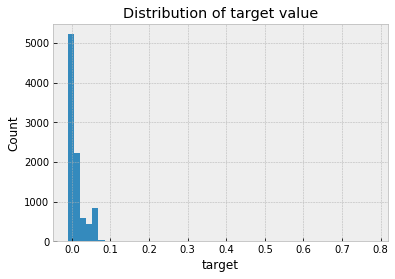

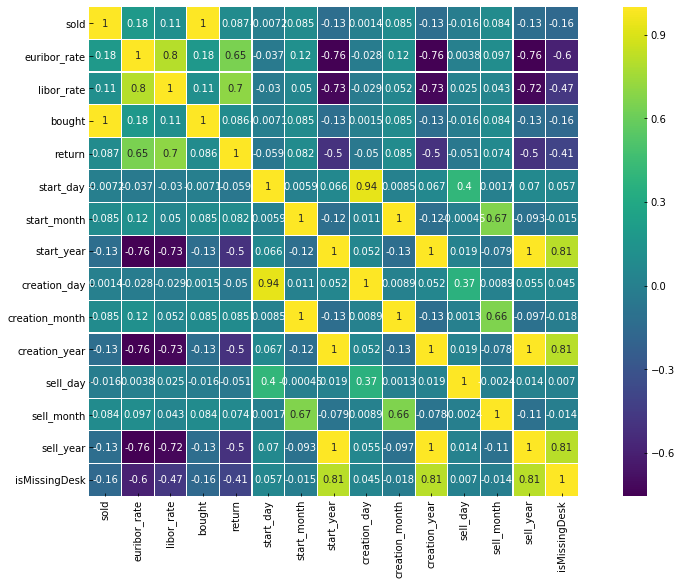

In [22]:
plotHeatMap(data.train)

In [23]:
is_missing_train = np.zeros((data.train.shape[0],))
is_missing_test = np.zeros((data.test.shape[0],))
data.addColumns(colName='isMissinglibor',testData=is_missing_test,trainData=is_missing_train,type='cat')
data.test.ix[data.test['libor_rate'].isnull() == True,'isMissinglibor'] = 1
data.train.ix[data.train['libor_rate'].isnull() == True,'isMissinglibor'] = 1
data.test.ix[data.test['libor_rate'].isnull() == True,'libor_rate'] = np.nan
data.train.ix[data.train['libor_rate'].isnull() == True,'libor_rate'] = np.nan
from sklearn.preprocessing import Imputer
imr = Imputer(missing_values=np.nan, strategy='mean', axis=0)
imr = imr.fit(data.train['libor_rate'].reshape(-1,1))
data.train['libor_rate'] = imr.transform(data.train['libor_rate'].reshape(-1,1))
data.test['libor_rate'] = imr.transform(data.test['libor_rate'].reshape(-1,1))

/home/ab/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """


In [24]:
from sklearn.preprocessing import Imputer

In [25]:
imr = Imputer(missing_values=np.nan, strategy='mean', axis=0)
imr = imr.fit(data.train['libor_rate'].reshape(-1,1))

/home/ab/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


In [26]:
data.train['libor_rate'] = imr.transform(data.train['libor_rate'].reshape(-1,1))
data.test['libor_rate'] = imr.transform(data.test['libor_rate'].reshape(-1,1))

/home/ab/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.
/home/ab/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


### Now its time for last hedgevalue

Since hedge is the highly dependent upon rate and bought and sold too

In [27]:
is_missing_train = np.zeros((data.train.shape[0],))
is_missing_test = np.zeros((data.test.shape[0],))
data.addColumns(colName='isMissinghedge',testData=is_missing_test,trainData=is_missing_train,type='cat')
data.test.ix[data.test['hedge_value'].isnull() == True,'isMissinghedge'] = 1
data.train.ix[data.train['hedge_value'].isnull() == True,'isMissinghedge'] = 1

data.train.ix[data.train['hedge_value'].isnull() == True,'hedge_value'] = 'Other'
data.test.ix[data.test['hedge_value'].isnull() == True,'hedge_value'] = 'Other'

In [28]:
checkNull(data)

Null Values Info


# Let Me do Some for Cleaning

In [29]:
for i in data.category[1:]:
    print(i)
    print(set(data.train[i]))
    print(set(data.test[i]))    

office_id
{'OFF00001002', 'OFF00001001'}
{'OFF00001002', 'OFF00001001'}
pf_category
{'A', 'E', 'B', 'C', 'D'}
{'A', 'D', 'B', 'C'}
country_code
{'N', 'U', 'T', 'Z', 'M'}
{'N', 'U', 'T', 'Z', 'M'}
currency
{'GBP', 'CHF', 'EUR', 'USD', 'JPY'}
{'GBP', 'CHF', 'EUR', 'USD', 'JPY'}
indicator_code
{False, True}
{False, True}
type
{'A', 'E', 'H', 'G', 'F', 'B', 'C', 'D'}
{'A', 'E', 'H', 'F', 'B', 'C', 'D'}
hedge_value
{False, True, 'Other'}
{False, True, 'Other'}
status
{False, True}
{False, True}
isMissingDesk
{0.0, 1.0}
{0.0, 1.0}
isMissinglibor
{0.0, 1.0}
{0.0, 1.0}
isMissinghedge
{0.0, 1.0}
{0.0, 1.0}


In [30]:
data.train['indicator_code'] = data.train['indicator_code'].astype(int)
data.test['indicator_code'] = data.test['indicator_code'].astype(int)
data.train['isMissingDesk'] = data.train['isMissingDesk'].astype(int)
data.test['isMissingDesk'] = data.test['isMissingDesk'].astype(int)
data.train['isMissinghedge'] = data.train['isMissinghedge'].astype(int)
data.test['isMissinghedge'] = data.test['isMissinghedge'].astype(int)
data.train['isMissinglibor'] = data.train['isMissinglibor'].astype(int)
data.test['isMissinglibor'] = data.test['isMissinglibor'].astype(int)

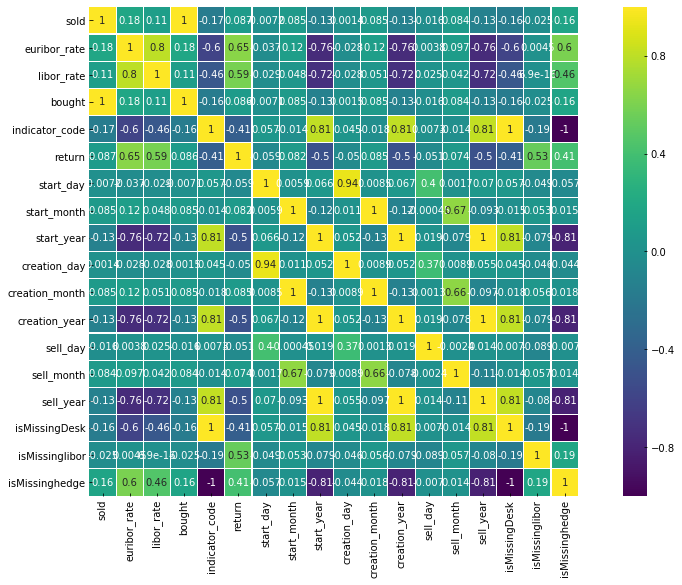

In [31]:
plotHeatMap(data.train)

In [32]:
data.train[data.train['type'] == 'G']

,portfolio_id,desk_id,office_id,pf_category,sold,country_code,euribor_rate,currency,libor_rate,bought,...,start_year,creation_day,creation_month,creation_year,sell_day,sell_month,sell_year,isMissingDesk,isMissinglibor,isMissinghedge
5236,PF00011209,DSK0000NAN,OFF00001001,A,3.299487e+07,T,0.00128,USD,0.617785,3.297977e+07,...,2013,25,10,2013,25,10,2013,1,0,1


In [33]:
data.train[data.train['pf_category'] == 'E']

,portfolio_id,desk_id,office_id,pf_category,sold,country_code,euribor_rate,currency,libor_rate,bought,...,start_year,creation_day,creation_month,creation_year,sell_day,sell_month,sell_year,isMissingDesk,isMissinglibor,isMissinghedge
2667,PF00005075,DSK00004478,OFF00001001,E,1.445498e+08,Z,0.00428,EUR,0.997216,1.428498e+08,...,2010,15,6,2010,22,3,2010,0,1,1
2668,PF00005076,DSK00004479,OFF00001001,E,1.366377e+08,Z,0.00428,EUR,0.997216,1.345280e+08,...,2010,15,6,2010,21,6,2010,0,1,1


# Remove The type 'G' Since it is not in TestData

In [34]:
data.train = data.train.drop(5236)
data.train = data.train.drop(2667)                          
data.train = data.train.drop(2668)                             

# Finally all the null values have been resolved

In [35]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.cross_validation import KFold

/home/ab/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [36]:
# data.train.columns
col = ['office_id', 'pf_category', 'sold',
       'country_code', 'euribor_rate', 'currency', 'libor_rate', 'bought',
       'indicator_code', 'type', 'hedge_value','status',
       'start_day', 'start_month', 'start_year', 'creation_day',
       'creation_month', 'creation_year', 'sell_day', 'sell_month',
       'sell_year', 'isMissingDesk', 'isMissinghedge','isMissinglibor']

In [37]:
target = data.train['return'].ravel()
train = data.train[col]
test= data.test[col] # Creats an array of the test data

In [38]:
train.shape

(9361, 24)

In [39]:
test.shape

(4801, 24)

In [40]:
encodeCol = ['pf_category','country_code','currency','type','hedge_value']
def encode(train,test,encodeCol):
    for i in encodeCol:
        print(i)
        train = pd.concat([train,pd.get_dummies(train[i])],axis=1)
        test = pd.concat([test,pd.get_dummies(test[i])],axis=1)
        train = train.drop(i,axis=1)
        test = test.drop(i,axis=1)
    return train,test
train,test = encode(train,test,encodeCol)

pf_category
country_code
currency
type
hedge_value


In [41]:
train.shape,test.shape

((9361, 43), (4801, 43))

In [42]:
  def scaler(train,test,columns):
        from sklearn.preprocessing import StandardScaler
        for colName in columns:
            print(colName)
            std_scale = StandardScaler().fit(test[colName].reshape(-1,1))
            test[colName] = std_scale.transform(test[colName].reshape(-1,1))
            train[colName] = std_scale.transform(train[colName].reshape(-1,1))
        return train,test

In [43]:
cont = ['euribor_rate','libor_rate','bought','sold','status']

In [44]:
train,test = scaler(train,test,cont)

euribor_rate
libor_rate
bought
sold
status


/home/ab/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """
/home/ab/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  
/home/ab/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  import sys
/home/ab/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [45]:
train = train.drop('office_id',axis=1)
test = test.drop('office_id',axis=1)

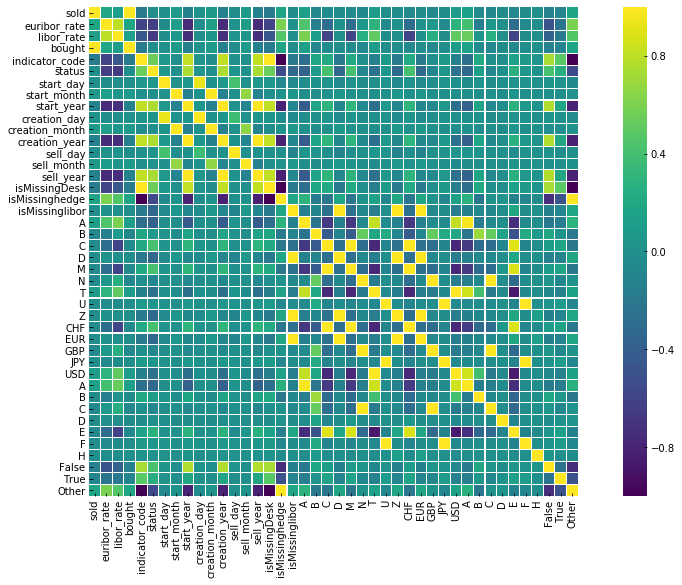

In [46]:
plotHeatMap(train,an=False)

In [47]:
Main_Train = train.values
Main_Test = test.values
Main_Train_target = target

In [156]:
def CustomGridSearch(estimators,param_grid,data,target):
    from sklearn.grid_search import GridSearchCV
    for i in estimators:
        clf = GridSearchCV(estimator=estimators[i],param_grid=param_grid[i],n_jobs=-1,verbose=1)
        clf.fit(data,target)
        result[i] = clf
        print(clf.best_score_)
    return result


In [157]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Main_Train, Main_Train_target, test_size=0.2, random_state=0)

In [158]:
# GBM
# Ridge
# SVR

In [159]:
rf_candidates = [
   {'n_estimators':[10,20,30,50],
     'max_depth':[5,8,15,15,30,None],
#   'min_samples_split': [1,2,5,10,15,100],
    'min_samples_leaf': [1,2,5,10],
    'max_features':['log2','sqrt',None]
   }
]
lr_candidates = [
    {
        'fit_intercept' : [True,False],
        'normalize': [True,False]
    }
]
ls_candidates = [
    {
        'alpha': [0.1,1.0,10],
        'normalize' : [True,False]
    }
]
svr_candidates=[
    {
        'c': [0.001,0.001,0.1,1,10,100,100],
        'gamma': ['Auto',0.1,1,10]
    }
]

In [160]:
param = {
    'rf' : rf_candidates,
    'lr' : lr_candidates,
    'ls' : ls_candidates,
    'svr' : ls_candidates
}

In [161]:
from sklearn.linear_model import Lasso,LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [162]:
estimator = {
              'rf':RandomForestRegressor(),
              'svr':SVR(),
              'lr':LinearRegression(),
              'ls':Lasso()
            }

In [163]:
result = CustomGridSearch(estimators=estimator,param_grid=param,data=X_train,target=y_train)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Done 140 tasks      | elapsed:   11.6s
[Parallel(n_jobs=-1)]: Done 297 tasks      | elapsed:   29.6s
[Parallel(n_jobs=-1)]: Done 547 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:  1.9min finished


0.8066251955931077
Fitting 3 folds for each of 6 candidates, totalling 18 fits


KeyboardInterrupt: 

In [151]:
result['rf']

KeyError: 'rf'

In [98]:
# RF = result['rf']
RF

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid=[{'n_estimators': [10, 20, 30, 50], 'max_depth': [5, 8, 15, 15, 30, None], 'min_samples_leaf': [1, 2, 5, 10], 'max_features': ['log2', 'sqrt', None]}],
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

In [86]:
pd.DataFrame(RF.grid_scores_)

,parameters,mean_validation_score,cv_validation_scores
0,"{'max_depth': 5, 'max_features': 'log2', 'min_...",0.779896,"[0.890998467095, 0.889073341721, 0.559617294166]"
1,"{'max_depth': 5, 'max_features': 'log2', 'min_...",0.774335,"[0.881787402705, 0.884422362465, 0.556796522617]"
2,"{'max_depth': 5, 'max_features': 'log2', 'min_...",0.777387,"[0.883416980655, 0.887837408825, 0.560905578667]"
3,"{'max_depth': 5, 'max_features': 'log2', 'min_...",0.778939,"[0.888322443191, 0.888059341057, 0.560433891251]"
4,"{'max_depth': 5, 'max_features': 'log2', 'min_...",0.771851,"[0.897843084285, 0.859020486754, 0.558688404041]"
5,"{'max_depth': 5, 'max_features': 'log2', 'min_...",0.773095,"[0.883850361595, 0.879713545125, 0.555720162787]"
6,"{'max_depth': 5, 'max_features': 'log2', 'min_...",0.779232,"[0.88807187682, 0.8919137606, 0.557711120675]"
7,"{'max_depth': 5, 'max_features': 'log2', 'min_...",0.778595,"[0.890375850855, 0.886974332569, 0.558435113368]"
8,"{'max_depth': 5, 'max_features': 'log2', 'min_...",0.768970,"[0.874142506073, 0.872084073182, 0.560684157372]"
9,"{'max_depth': 5, 'max_features': 'log2', 'min_...",0.776525,"[0.890841798316, 0.880673461584, 0.558060483623]"


In [ ]:
da

In [ ]:
train.info()